## Titanic - Machine Learning from Disaster

### The Challenge
The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [2]:
train_df = pd.read_csv('train.csv')
print('data successfully read into pandas dataframe')

data successfully read into pandas dataframe


In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
numeric_data = train_df.select_dtypes(include=[np.number])
numeric_data.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [6]:
train_df['Age'].replace(np.NaN, train_df['Age'].mean(), inplace=True)

sex_dummies = pd.get_dummies(train_df['Sex']).astype(int)
embarked_dummies = pd.get_dummies(train_df['Embarked']).astype(int)

train_df = pd.concat([train_df, sex_dummies, embarked_dummies], axis=1)

# train_df['Have_Cabin'] = train_df['Cabin'].apply(lambda x: 1 if pd.notnull(x) else 0).astype(int)
# train_df['non_Cabin'] = train_df['Cabin'].apply(lambda x: 0 if pd.notnull(x) else 1).astype(int)

train_df.drop(['Sex', 'Cabin', 'Embarked', 'Name', 'Ticket'],axis=1, inplace=True)

In [7]:
train_df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
0,1,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,2,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,0,1,0,0,1


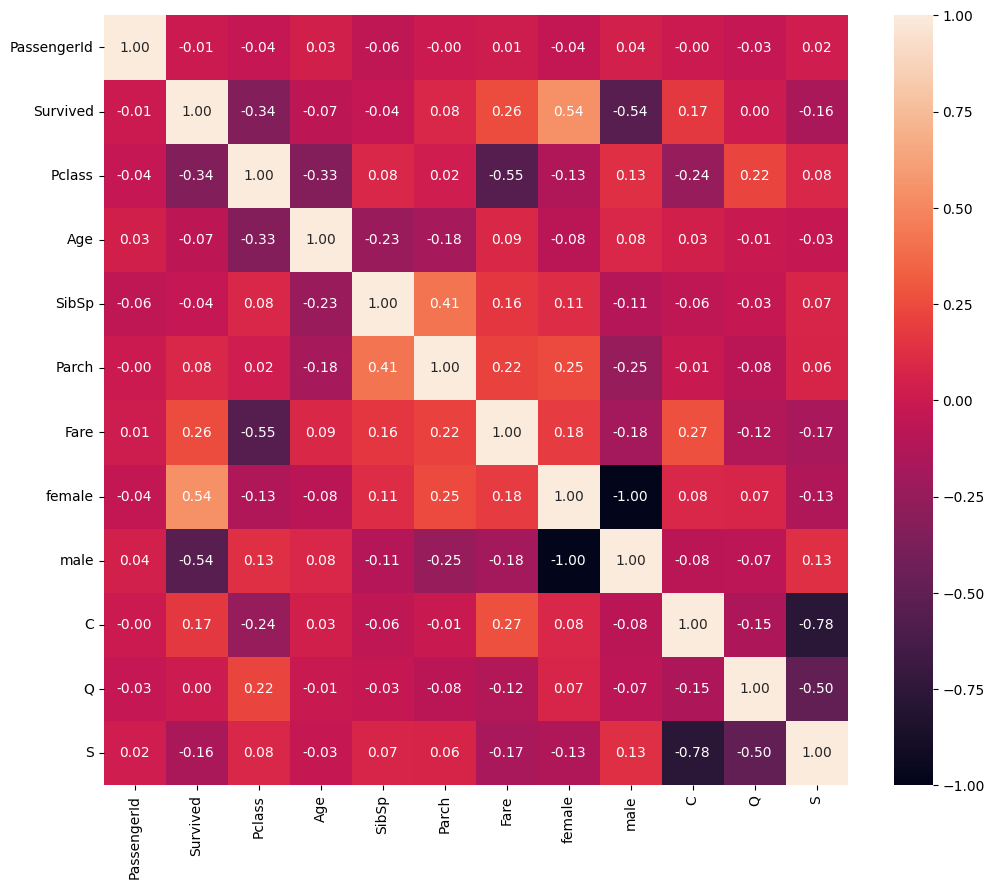

In [8]:
# check correlation again with heatmap

plt.figure(figsize=(12,10))
sns.heatmap(train_df.corr(), annot=True, fmt='.2f')
plt.show();

In [9]:
X = train_df.drop(['Survived'], axis=1)
y = train_df['Survived']

In [10]:
# 1. Logistic Regression
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression(random_state=0,max_iter=2000)
model_lr.fit(X, y)
pred_lr = model_lr.predict(X)

accuracy_lr = accuracy_score(y, pred_lr)
print(f"Accuracy_lr: {accuracy_lr}")

Accuracy_lr: 0.8013468013468014


In [48]:
# parameters = {'C':[0.01, 0.1, 1],
#              'penalty': ['l2'],
#              'solver': ['lbfgs']}

# logreg_cv = GridSearchCV(estimator=model_lr, cv=10, param_grid=parameters)
# logreg_cv.fit(X, y)

# print('Accuracy:', logreg_cv.best_score_)
from sklearn.tree import DecisionTreeClassifier

parameters = {'criterion': ['gini', 'entropy'],
             'splitter':['best', 'random'],
             'max_depth': [2 * n for n in range(1, 10)],
             'max_features': [None, 'sqrt', 'log2'],
             'min_samples_leaf': [1,2,4],
             'min_samples_split': [2,5,10]}

tree = DecisionTreeClassifier()

tree_cv = GridSearchCV(tree, parameters, cv=10)
tree_cv.fit(X, y)

accuracy_tree = tree_cv.score(X, y)
print('Accuracy_tree:', accuracy_tree)

Accuracy_tree: 0.8686868686868687


In [11]:
# 2 SVM
from sklearn.svm import SVC

model_svm = SVC()
model_svm.fit(X, y)

accuracy_svm = model_svm.score(X, y)
print('Accuracy_svm:', accuracy_svm)

Accuracy_svm: 0.6644219977553311


In [12]:
# 3. K Nearest neigbours classifier (KNN)
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier(n_neighbors=3)
model_knn.fit(X, y)

accuracy_knn = model_knn.score(X, y)
print('Accuracy_knn:', accuracy_knn)

Accuracy_knn: 0.797979797979798


In [13]:
#4. Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB

model_gnb = GaussianNB()
model_gnb.fit(X, y)

accuracy_gnb = model_gnb.score(X, y)
print('Accuracy_gnb:', accuracy_gnb)

Accuracy_gnb: 0.7901234567901234


In [14]:
#5. Ridge Classifier
from sklearn.linear_model import RidgeClassifier

model_rc = RidgeClassifier()
model_rc.fit(X, y)

accuracy_rc = model_rc.score(X, y)
print('Accuracy_rc:', accuracy_rc)

Accuracy_rc: 0.8002244668911336


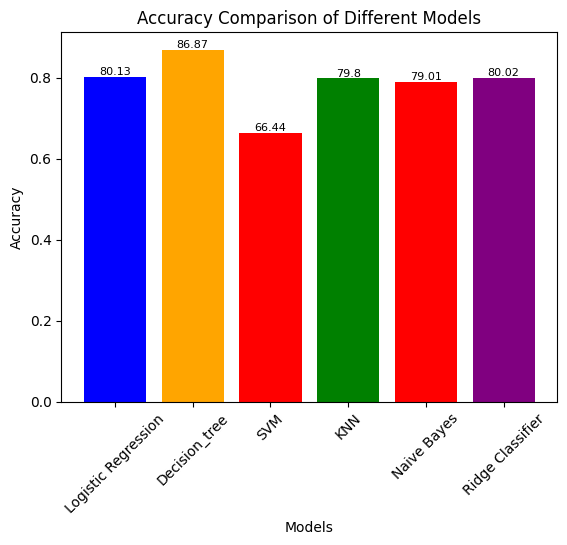

In [49]:
import matplotlib.pyplot as plt

model_names = ['Logistic Regression','Decision_tree', 'SVM', 'KNN', 'Naive Bayes', 'Ridge Classifier']
accuracies = [accuracy_lr, accuracy_tree, accuracy_svm, accuracy_knn, accuracy_gnb, accuracy_rc]

# Define colors for each bar
colors = ['blue', 'orange', 'red', 'green', 'red', 'purple']

# Create a bar plot with different colors
bars = plt.bar(model_names, accuracies, color=colors)

plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Different Models')
plt.xticks(rotation=45)

# Annotate bars with accuracy scores
for bar, accuracy in zip(bars, accuracies):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(accuracy*100, 2), ha='center', va='bottom', color='black', fontsize=8)

plt.show()

In [53]:
# We useing Decision_tree model

test_df = pd.read_csv('test.csv')
print('data successfully read into pandas dataframe')

data successfully read into pandas dataframe


In [17]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [18]:
test_df['Age'].replace(np.NaN, test_df['Age'].mean(), inplace=True)
test_df['Fare'].replace(np.NaN, test_df['Fare'].mean(), inplace=True)

sex_dummies = pd.get_dummies(test_df['Sex']).astype(int)
embarked_dummies = pd.get_dummies(test_df['Embarked']).astype(int)

test_df = pd.concat([test_df, sex_dummies, embarked_dummies], axis=1)

# test_df['Have_Cabin'] = test_df['Cabin'].apply(lambda x: 1 if pd.notnull(x) else 0).astype(int)
# test_df['non_Cabin'] = test_df['Cabin'].apply(lambda x: 0 if pd.notnull(x) else 1).astype(int)

test_df.drop(['Sex', 'Cabin', 'Embarked', 'Name', 'Ticket'],axis=1, inplace=True)

In [50]:
# predict test data
test_predictions = tree_cv.predict(test_df)

In [51]:
survival_test_data = pd.DataFrame(test_df['PassengerId'])
survival_test_data['Survived'] = test_predictions

In [52]:
survival_test_data.to_csv('survival_test_data.csv', index=False)

### Thank you
## Author

[Neelesh Chidar](https://www.kaggle.com/neeleshchidar)